<a href="https://colab.research.google.com/github/Suji04/RIT-DSCI-633-FDS/blob/main/Assignments/DSCI_633_Assignment_6_solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Download iris dataset and usual libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import datasets
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans

from scipy import stats
from scipy.spatial import Voronoi, voronoi_plot_2d

In [2]:
iris_data = datasets.load_iris()

print("feature names: ", iris_data.feature_names)
print("class names: ", iris_data.target_names)


X = iris_data.data
print("X shape: ", np.shape(X))

y = iris_data.target
print("y shape: ", np.shape(y))

feature names:  ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
class names:  ['setosa' 'versicolor' 'virginica']
X shape:  (150, 4)
y shape:  (150,)


## Use GMM to separate the clusters using all 4 features: petal length & width, and sepal length & width. Map each cluster to a class by picking the most common class for each cluster.

In [3]:
gmm_model = GaussianMixture(n_components=3, random_state=25102021)
gmm_model.fit(X)
clusters = gmm_model.predict(X)

cluster_dict = {
    0 : [],
    1 : [],
    2 : [],
}

for i in range(len(clusters)):
  if clusters[i]==0: cluster_dict[0].append(i)
  elif clusters[i]==1: cluster_dict[1].append(i)
  else: cluster_dict[2].append(i)

label_map = dict()

for cluster, points in cluster_dict.items():
  label_map[cluster] = stats.mode(y[points]).mode[0]

print("label map (cluster number: class)", label_map)

label map (cluster number: class) {0: 2, 1: 0, 2: 1}


## Report value of np.sum(y_pred==y) / len(y_pred)

In [4]:
predicted_class = []
for i in range(len(clusters)):
  predicted_class.append(label_map[clusters[i]])
  
np.sum(predicted_class==y) / len(y)

0.9666666666666667

## Generate blobs

In [5]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=2000, 
                  centers=np.array([[ 0.2,  2.3],
                                    [-1.5 ,  2.3],
                                    [-2.8,  1.8],
                                    [-2.8,  2.8],
                                    [-2.8,  1.3]]),
                  cluster_std=np.array([0.4, 0.3, 0.1, 0.1, 0.1]))                        

## Plot blobs

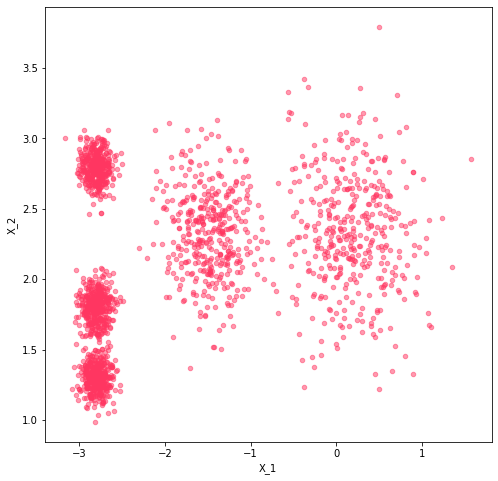

In [6]:
df = pd.DataFrame(dict(x=X[:,0], y=X[:,1]))
fig, ax = plt.subplots(figsize=(8,8))
df.plot(ax=ax, kind='scatter', x='x', y='y', color="#ff3661", alpha=.5)
plt.xlabel('X_1')
plt.ylabel('X_2')
plt.show()

## Train k-means to train on this dataset

In [7]:
model_1 = KMeans(n_clusters=5, random_state=25102021)
model_1.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=25102021, tol=0.0001, verbose=0)

## Print the value of the centroids

In [8]:
centroids = model_1.cluster_centers_
print(centroids)

[[-2.80200164  1.80941615]
 [ 0.19499138  2.33113931]
 [-2.79820605  2.79652279]
 [-1.46611386  2.31637751]
 [-2.80183152  1.30408698]]


## Predict labels of new instances

In [9]:
X_new = np.array([[0, 2], [3, 2], [-3, 3], [-3, 2.5]])
pred = model_1.predict(X_new)
for x,p in zip(X_new, pred):
  print(x, " ---> cluster ", p)

[0. 2.]  ---> cluster  1
[3. 2.]  ---> cluster  1
[-3.  3.]  ---> cluster  2
[-3.   2.5]  ---> cluster  2


## Plot model’s decision boundaries using data, centroids

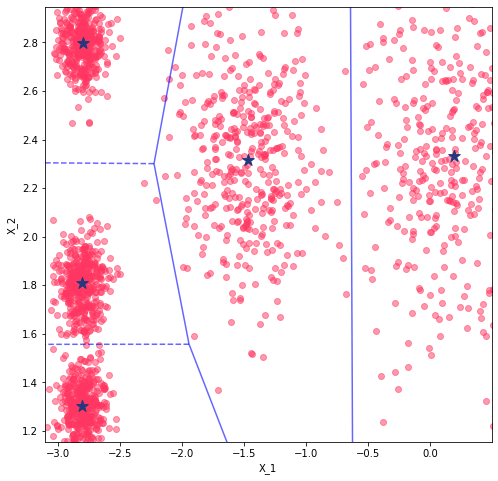

In [10]:
fig, ax = plt.subplots(figsize=(8, 8))
vor = Voronoi(centroids)
voronoi_plot_2d(vor, show_vertices=False, show_points=False, line_colors='b', line_width=1.5, line_alpha=0.6, point_size=2, ax=ax)
plt.scatter(X[:, 0], X[:, 1], c="#ff3661", alpha=.5)
plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', s=150, c='#23387d')
plt.xlabel('X_1')
plt.ylabel('X_2')
plt.show()

## Set values of k = 3 and k = 8, explain your results in both cases by means of the resultant intertia

In [11]:
model_2 = KMeans(n_clusters=3, random_state=25102021)
model_2.fit(X)

model_3 = KMeans(n_clusters=8, random_state=25102021)
model_3.fit(X)

print("inertia for k=3 : ", model_2.inertia_)
print("inertia for k=8 : ", model_3.inertia_)

inertia for k=3 :  660.0541462569859
inertia for k=8 :  126.50303691651087


**As we increase the number of clusters the inertia decreases as we can see from our experiment also. However, a smaller inertia does not necessarily mean a better model.**

## Plot the inertia as a function of k and analyze the resulting curve, show plots

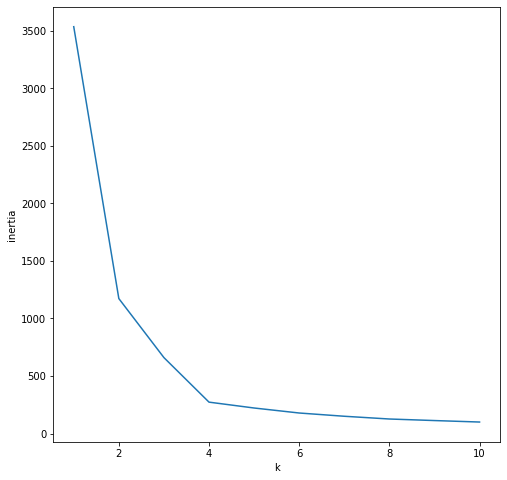

In [12]:
inertia_arr = []
k_arr = range(1,11)

for k in k_arr:
  model = KMeans(n_clusters=k, random_state=25102021)
  model.fit(X)
  inertia_arr.append(model.inertia_)

fig, ax = plt.subplots(figsize=(8, 8))
plt.plot(k_arr, inertia_arr)
plt.xlabel('k')
plt.ylabel('inertia')
plt.show()

## What is the value of k at elbow?
**Value of k at elbow = 4**